In [8]:

import pandas as pd
import numpy as np
import os 
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

# Utilize Paralell computing to speed up loading the data

In [9]:
# Use dask parallel compute to load the data


import dask.dataframe as dd
data = (r'C:\Users\phili\OneDrive\Desktop\Contracts Project\FY2020_All_Contracts_Full_20210809_2.csv')
df = dd.read_csv(data, dtype={'dod_acquisition_program_code': 'object',\
                              'naics_code': 'object',\
                              'parent_award_agency_id': 'object',\
                              'primary_place_of_performance_zip_4': 'object',\
                              'program_acronym': 'object',\
                              'recipient_fax_number': 'object',\
                              'recipient_parent_duns': 'object',\
                              'recipient_phone_number': 'object',\
                              'recipient_zip_4_code': 'object',\
                              'sam_exception_description': 'object',\
                             })
df

,contract_transaction_unique_key,contract_award_unique_key,award_id_piid,modification_number,transaction_number,parent_award_agency_id,parent_award_agency_name,parent_award_id_piid,parent_award_modification_number,federal_action_obligation,total_dollars_obligated,base_and_exercised_options_value,current_total_value_of_award,base_and_all_options_value,potential_total_value_of_award,disaster_emergency_fund_codes_for_overall_award,outlayed_amount_funded_by_COVID-19_supplementals_for_overall_aw,obligated_amount_funded_by_COVID-19_supplementals_for_overall_a,action_date,action_date_fiscal_year,period_of_performance_start_date,period_of_performance_current_end_date,period_of_performance_potential_end_date,ordering_period_end_date,solicitation_date,awarding_agency_code,awarding_agency_name,awarding_sub_agency_code,awarding_sub_agency_name,awarding_office_code,awarding_office_name,funding_agency_code,funding_agency_name,funding_sub_agency_code,funding_sub_agency_name,funding_office_code,funding_office_name,treasury_accounts_funding_this_award,federal_accounts_funding_this_award,object_classes_funding_this_award,program_activities_funding_this_award,foreign_funding,foreign_funding_description,sam_exception,sam_exception_description,recipient_duns,recipient_name,recipient_doing_business_as_name,cage_code,recipient_parent_duns,recipient_parent_name,recipient_country_code,recipient_country_name,recipient_address_line_1,recipient_address_line_2,recipient_city_name,recipient_county_name,recipient_state_code,recipient_state_name,recipient_zip_4_code,recipient_congressional_district,recipient_phone_number,recipient_fax_number,primary_place_of_performance_country_code,primary_place_of_performance_country_name,primary_place_of_performance_city_name,primary_place_of_performance_county_name,primary_place_of_performance_state_code,primary_place_of_performance_state_name,primary_place_of_performance_zip_4,primary_place_of_performance_congressional_district,award_or_idv_flag,award_type_code,award_type,idv_type_code,idv_type,multiple_or_single_award_idv_code,multiple_or_single_award_idv,type_of_idc_code,type_of_idc,type_of_contract_pricing_code,type_of_contract_pricing,award_description,action_type_code,action_type,solicitation_identifier,number_of_actions,inherently_governmental_functions,inherently_governmental_functions_description,product_or_service_code,product_or_service_code_description,contract_bundling_code,contract_bundling,dod_claimant_program_code,dod_claimant_program_description,naics_code,naics_description,recovered_materials_sustainability_code,recovered_materials_sustainability,domestic_or_foreign_entity_code,domestic_or_foreign_entity,dod_acquisition_program_code,dod_acquisition_program_description,information_technology_commercial_item_category_code,information_technology_commercial_item_category,epa_designated_product_code,epa_designated_product,country_of_product_or_service_origin_code,country_of_product_or_service_origin,place_of_manufacture_code,place_of_manufacture,subcontracting_plan_code,subcontracting_plan,extent_competed_code,extent_competed,solicitation_procedures_code,solicitation_procedures,type_of_set_aside_code,type_of_set_aside,evaluated_preference_code,evaluated_preference,research_code,research,fair_opportunity_limited_sources_code,fair_opportunity_limited_sources,other_than_full_and_open_competition_code,other_than_full_and_open_competition,number_of_offers_received,commercial_item_acquisition_procedures_code,commercial_item_acquisition_procedures,small_business_competitiveness_demonstration_program,simplified_procedures_for_certain_commercial_items_code,simplified_procedures_for_certain_commercial_items,a76_fair_act_action_code,a76_fair_act_action,fed_biz_opps_code,fed_biz_opps,local_area_set_aside_code,local_area_set_aside,price_evaluation_adjustment_preference_percent_difference,clinger_cohen_act_planning_code,clinger_cohen_act_planning,materials_supplies_articles_equipment_code,materials_supplies_articles_equip

In [10]:
# See all column names
df.columns.values

array(['contract_transaction_unique_key', 'contract_award_unique_key',
       'award_id_piid', 'modification_number', 'transaction_number',
       'parent_award_agency_id', 'parent_award_agency_name',
       'parent_award_id_piid', 'parent_award_modification_number',
       'federal_action_obligation', 'total_dollars_obligated',
       'base_and_exercised_options_value', 'current_total_value_of_award',
       'base_and_all_options_value', 'potential_total_value_of_award',
       'disaster_emergency_fund_codes_for_overall_award',
       'outlayed_amount_funded_by_COVID-19_supplementals_for_overall_aw',
       'obligated_amount_funded_by_COVID-19_supplementals_for_overall_a',
       'action_date', 'action_date_fiscal_year',
       'period_of_performance_start_date',
       'period_of_performance_current_end_date',
       'period_of_performance_potential_end_date',
       'ordering_period_end_date', 'solicitation_date',
       'awarding_agency_code', 'awarding_agency_name',
       'awardi

In [11]:
# Covert data back to pandas
df= df.compute()

C:\Users\phili\Anaconda3\lib\multiprocessing\pool.py:125: DtypeWarning: Columns (121,122) have mixed types.Specify dtype option on import or set low_memory=False.
  result = (True, func(*args, **kwds))


In [12]:
# df = df['action_date']= pd.to_datetime(df['action_date'])
# df=df['month_of_date'] = df['action_date'].dt.month
# df.head()

In [13]:
# Create a small subset of the data for better performance
df = df[['contract_transaction_unique_key', 'contract_award_unique_key',
       'award_id_piid', 'transaction_number',
       'parent_award_agency_id', 'parent_award_agency_name','funding_office_name','action_date',\
         'primary_place_of_performance_state_name',\
       'federal_action_obligation', 'total_dollars_obligated','awarding_agency_name','award_description','award_type']]
df.head()
# df.to_csv('tableau_data.csv', sep='\t', encoding='utf-8')


,contract_transaction_unique_key,contract_award_unique_key,award_id_piid,transaction_number,parent_award_agency_id,parent_award_agency_name,funding_office_name,action_date,primary_place_of_performance_state_name,federal_action_obligation,total_dollars_obligated,awarding_agency_name,award_description,award_type
0,1501_4730_15JA3420F00000002_0_GS25F0011M_0,CONT_AWD_15JA3420F00000002_1501_GS25F0011M_4730,15JA3420F00000002,0.0,4730,FEDERAL ACQUISITION SERVICE,U.S. ATTORNEYS OFFICE-LA(E) (USA33),2019-10-16,LOUISIANA,6685.00,5217.22,DEPARTMENT OF JUSTICE (DOJ),"PAPER SHREDDING SERVICES, PURGING, AND CD/DVD/...",DELIVERY ORDER
1,9700_9700_SPE3SU20F777Q_0_SPE30017DS910_0,CONT_AWD_SPE3SU20F777Q_9700_SPE30017DS910_9700,SPE3SU20F777Q,0.0,9700,DEPT OF DEFENSE,DLA TROOP SUPPORT,2020-02-10,CONNECTICUT,231.38,231.38,DEPARTMENT OF DEFENSE (DOD),"4548978609!BROCCOLI FLORETS, CHL,",DELIVERY ORDER
2,9700_9700_SPE3SU20FDUK6_0_SPE30016DS675_0,CONT_AWD_SPE3SU20FDUK6_9700_SPE30016DS675_9700,SPE3SU20FDUK6,0.0,9700,DEPT OF DEFENSE,DLA TROOP SUPPORT,2020-09-11,TEXAS,550.99,550.99,DEPARTMENT OF DEFENSE (DOD),"4551064673!APPLES, CHL,",DELIVERY ORDER
3,9700_9700_FA700020F0001_P00001_FA700018D0007_0,CONT_AWD_FA700020F0001_9700_FA700018D0007_9700,FA700020F0001,0.0,9700,DEPT OF DEFENSE,10 CE,2020-09-24,COLORADO,277.50,17767.50,DEPARTMENT OF DEFENSE (DOD),PORTABLE CHEMICAL TOILETS - ADD FUNDS TO TASK ...,DELIVERY ORDER
4,9700_9700_SPE2D620F5SH0_0_SPE2DE17D0006_0,CONT_AWD_SPE2D620F5SH0_9700_SPE2DE17D0006_9700,SPE2D620F5SH0,0.0,9700,DEPT OF DEFENSE,DLA TROOP SUPPORT,2020-08-28,WISCONSIN,233.50,233.50,DEPARTMENT OF DEFENSE (DOD),4550932588!STERILE I-PAK DISPOSABLE 3 IN 1 ORA...,DELIVERY ORDER


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 14477
Data columns (total 14 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   contract_transaction_unique_key          1000000 non-null  object 
 1   contract_award_unique_key                1000000 non-null  object 
 2   award_id_piid                            1000000 non-null  object 
 3   transaction_number                       958428 non-null   float64
 4   parent_award_agency_id                   798900 non-null   object 
 5   parent_award_agency_name                 798900 non-null   object 
 6   funding_office_name                      998749 non-null   object 
 7   action_date                              1000000 non-null  object 
 8   primary_place_of_performance_state_name  929785 non-null   object 
 9   federal_action_obligation                1000000 non-null  float64
 10  total_dollars_obliga

In [15]:
df1=pd.pivot_table(df, index=['parent_award_agency_name'],values=['total_dollars_obligated'],aggfunc=np.sum)
df1 = df1.reset_index()
df1

df1 = df1.nlargest(5, 'total_dollars_obligated')
df1

,parent_award_agency_name,total_dollars_obligated
23,DEPT OF DEFENSE,4.048310e+11
35,FEDERAL ACQUISITION SERVICE,1.452685e+11
70,NATIONAL AERONAUTICS AND SPACE ADMINISTRATION,4.241187e+10
36,FEDERAL AVIATION ADMINISTRATION,2.795334e+10
131,"VETERANS AFFAIRS, DEPARTMENT OF",2.398888e+10


# Visualizations (Matplot Lib)

In [16]:
# count of contracts by agency
import datetime
  
cont_count = df.groupby(['action_date']).agg({'total_dollars_obligated':'sum'})
cont_count = cont_count.reset_index()
cont_count
cont_count['action_date']= pd.to_datetime(cont_count['action_date'])
cont_count['month_of_date'] = cont_count['action_date'].dt.month
cont_count
cont_count = cont_count.groupby(['month_of_date']).agg({'total_dollars_obligated':'sum'})
cont_count = cont_count.reset_index()
# cont_count


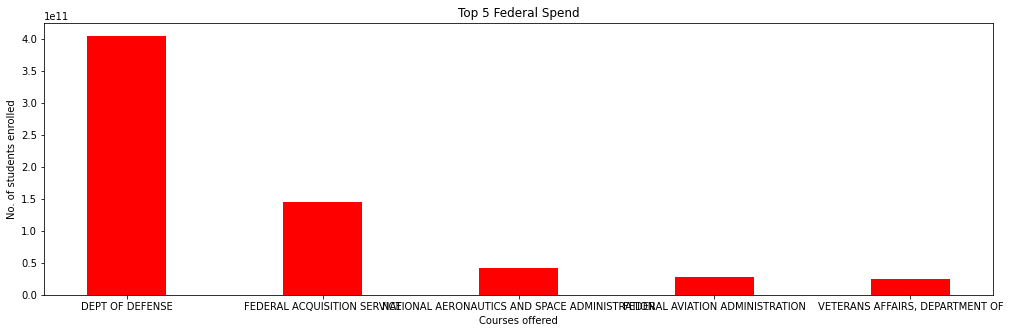

In [17]:

import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset

courses = df1['parent_award_agency_name'].to_list()
values = df1['total_dollars_obligated'].to_list()

  
fig = plt.figure(figsize = (17, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='red',
        width = 0.4)
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Top 5 Federal Spend")
plt.show()

<Figure size 1224x360 with 0 Axes>

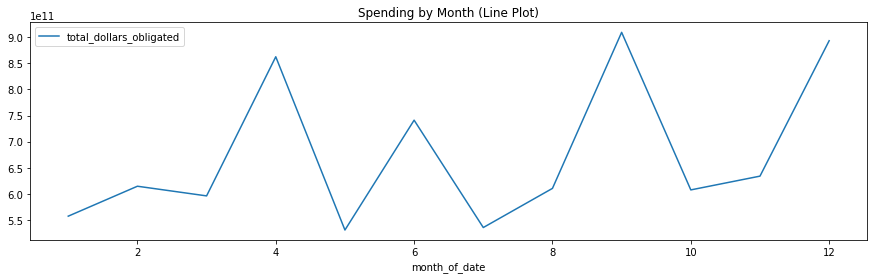

In [18]:
fig = plt.figure(figsize = (17, 5))
 

cont_count.plot(x="month_of_date", y="total_dollars_obligated",figsize=(15,4),title = 'Spending by Month (Line Plot)');


<Figure size 1224x360 with 0 Axes>

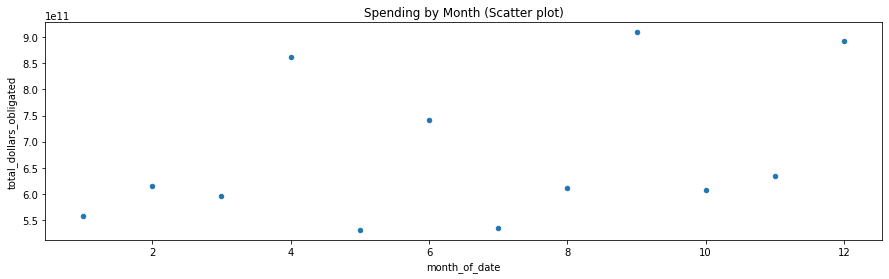

In [19]:
# Scatter plot


fig = plt.figure(figsize = (17, 5))

cont_count.plot(x="month_of_date", y="total_dollars_obligated",figsize=(15,4),\
                colormap ='CMRmap',title = 'Spending by Month (Scatter plot)',kind='scatter');
